# Pretty movie

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
save_fig = True
savefig_path = os.path.join(lib_path, "figures/Movie/")

In [2]:
from flu1ddyn.time_problem import *
from flu1ddyn.main_discontinu import *
from flu1ddyn.plot_fields import *
from flu1ddyn.plot_stats import *
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib widget
# rc("figure", figsize=(10, 5))
# rc("figure", dpi=120)

# Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en QUICK avec Euler explicite en temps.

La référence utilisée est une simulation TOF sur maillage fin.

In [3]:
n_lim = 10**9
t_fin_lim = 0.2

In [4]:
from copy import copy

Vtot = 0.02 * 0.005**2

phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)

phy_prop_sans_conv = copy(phy_prop)
phy_prop_sans_conv.v = 0.0

num_prop = NumericalProperties(
    dx=1.5 * 10**-5,
    schema="quick",
    time_scheme="rk3",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=0.5,
    interp_type="Ti",
    conv_interf="quick",
)

num_prop_T = NumericalProperties(
    dx=1.5 * 10**-5,
    schema="quick",
    time_scheme="rk3",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=0.5,
)

num_prop_ref = NumericalProperties(
    dx=1.5 * 10**-5,
    schema="weno",
    time_scheme="rk3",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=0.5,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
# markers.shift(0.007)
# markers = Bulles(phy_prop=phy_prop)

# Simulation

La simulation est réalisée avec la forme actuelle du code 3D

Dans ce cas là, il n'y a pas de modification des flux calculés en QUICK qui ne sont pas sur des faces coupées. Ainsi les flux qui sont à proximité de l'interface sont calculés avec une interpolation qui prend en compte la valeur de la cellule diphasique.

## Simulation TOF avec perte d'énergie

In [5]:
prob_ref = TimeProblem(
    get_T_creneau,
    plotter=[],
    markers=markers,
    phy_prop=phy_prop_sans_conv,
    num_prop=num_prop_ref,
)
prob_T = TimeProblem(
    get_T_creneau,
    plotter=[],
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop_T,
)


TOF
===
dt fourier
5.103373948658618e-07
Db / dx = 79
Monofluid convection :  weno

Energie
dt fourier
5.103373948658618e-07
Db / dx = 79
Monofluid convection :  quick
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact

TOF
===
dt fourier
5.103373948658618e-07
Db / dx = 79
Monofluid convection :  quick



Nombre de frames :  80


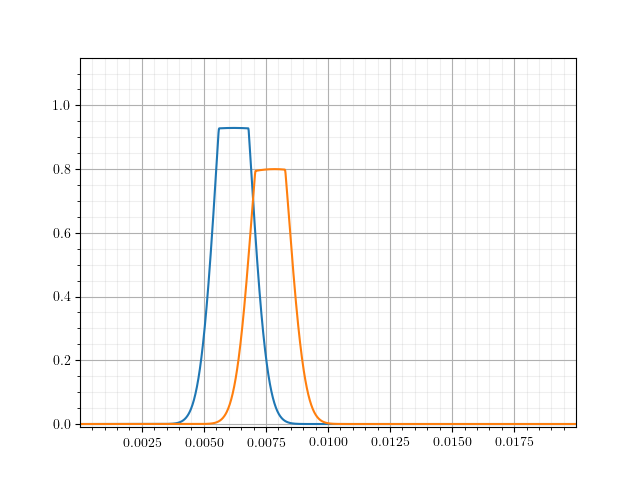

In [6]:
t_fin = 0.21

list_prob = [prob_ref, prob_T]

fig, ax = plt.subplots()
n_frame = 80
up = Compare(list_prob, ax, ylim=(-0.01, 1.15), run_time=t_fin, n_frames=n_frame)
print()
print("Nombre de frames : ", n_frame)
anim = FuncAnimation(
    fig,
    up,
    frames=n_frame,
    interval=41.6666667,
    blit=True,
    repeat=False,
    cache_frame_data=False,
)
# HTML(anim.to_jshtml())
anim.save(savefig_path + 'comparaison_TOF_ref_2.mp4', fps=24)

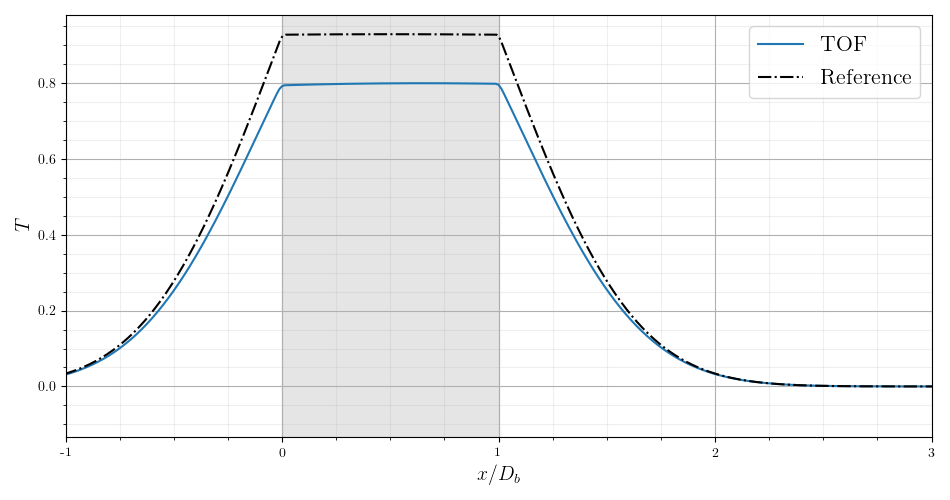

In [7]:
plotter = Plotter(
    "decale",
    flux_conv=False,
    lda_gradT=False,
    ispretty=True,
    zoom=(-1.0, 3.0),
    time=False,
)
# plotter.plot(prob_3d.problem_state, plot_Ti=False, label="EDmQmInt")
# plotter.plot(prob_E.problem_state, plot_Ti=False, label="ESP")
plotter.plot(prob_T.problem_state, label="TOF")
plotter.plot(prob_ref.problem_state, c="k", ls="-.", label="Reference")
# plotter.ax.set_xlim(0., 0.003)
if save_fig:
    plotter.fig.savefig(savefig_path + "ESP3D.pdf")


TOF
===
dE*/dt* = -2.1646e-07


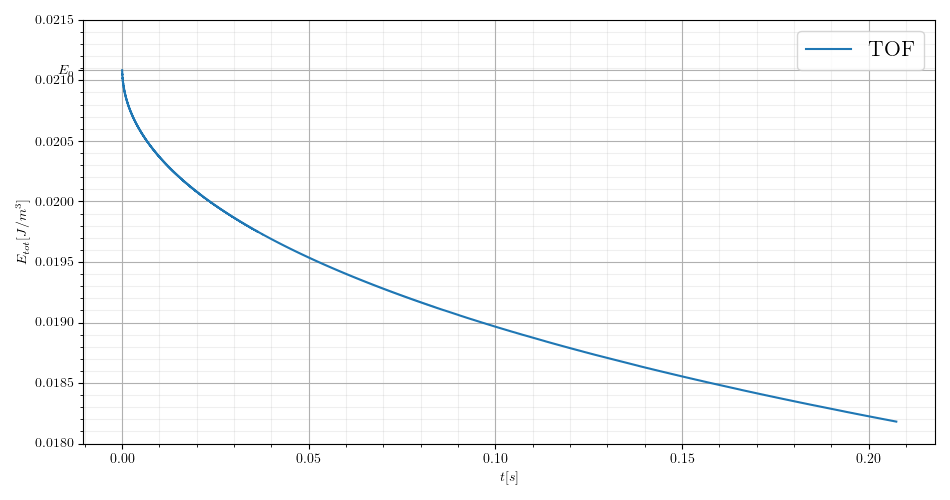

In [8]:
plot_en = EnergiePlot()
# plot_en.plot_tpb(prob_ref, label="Ref")
plot_en.plot_tpb(prob_T)
# plot_en.plot_tpb(prob_3d)
plot_en.add_E0()

## Simulation ESP sans perte d'énergie

In [5]:
prob_ref = TimeProblem(
    get_T_creneau,
    plotter=[],
    markers=markers,
    phy_prop=phy_prop_sans_conv,
    num_prop=num_prop_ref,
)

prob_E = TimeProblem(
    get_T_creneau,
    plotter=[],
    problem_state=StateProblemDiscontinuE,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
)


TOF
===
dt fourier
5.103373948658618e-07
Db / dx = 79
Monofluid convection :  weno

Energie
dt fourier
5.103373948658618e-07
Db / dx = 79
Monofluid convection :  quick
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact



Nombre de frames :  80


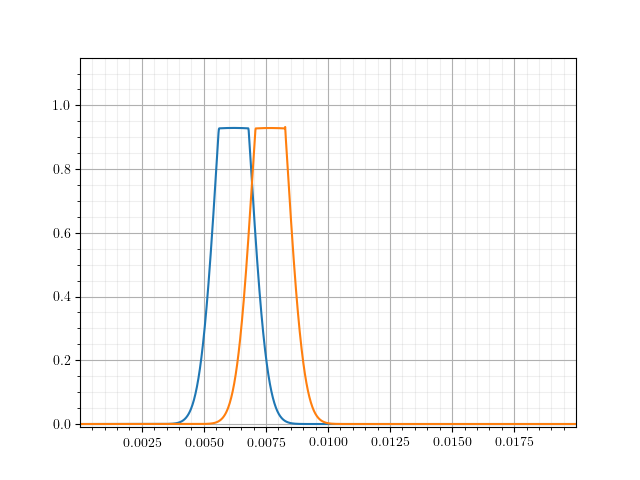

In [6]:
t_fin = 0.21

list_prob = [prob_ref, prob_E]

fig, ax = plt.subplots()
n_frame = 80
up = Compare(list_prob, ax, ylim=(-0.01, 1.15), run_time=t_fin, n_frames=n_frame)
print()
print("Nombre de frames : ", n_frame)
anim = FuncAnimation(
    fig,
    up,
    frames=n_frame,
    interval=41.6666667,
    blit=True,
    repeat=False,
    cache_frame_data=False,
)
# HTML(anim.to_jshtml())
anim.save(savefig_path + 'comparaison_ESP_ref_2.mp4', fps=24)

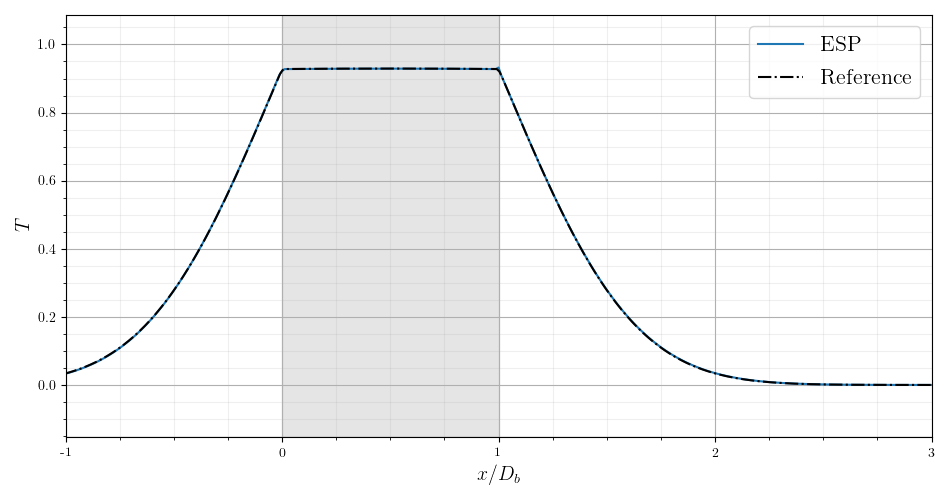

In [7]:
plotter = Plotter(
    "decale",
    flux_conv=False,
    lda_gradT=False,
    ispretty=True,
    zoom=(-1.0, 3.0),
    time=False,
)
# plotter.plot(prob_3d.problem_state, plot_Ti=False, label="EDmQmInt")
# plotter.plot(prob_E.problem_state, plot_Ti=False, label="ESP")
plotter.plot(prob_E.problem_state, label="ESP")
plotter.plot(prob_ref.problem_state, c="k", ls="-.", label="Reference")
# plotter.ax.set_xlim(0., 0.003)
if save_fig:
    plotter.fig.savefig(savefig_path + "ESP_ref_final_snapshot.pdf")

NameError: name 'prob_T' is not defined

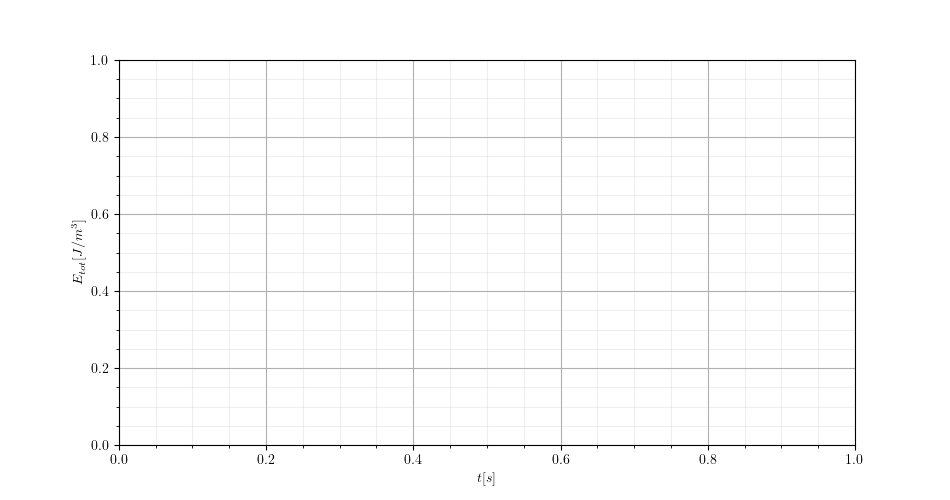

In [8]:
plot_en = EnergiePlot()
# plot_en.plot_tpb(prob_ref, label="Ref")
plot_en.plot_tpb(prob_T)
# plot_en.plot_tpb(prob_3d)
plot_en.add_E0()